In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [51]:
df = pd.read_csv('/kaggle/input/vindr-mammo-dataset/updated_metadata.csv')

df.head()

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split,directory_path
0,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,4e3a578fe535ea4f5258d3f7f4419db8,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2355.139893,1731.640015,2482.979980,1852.750000,training,Processed_Images/48575a27b7c992427041a82fa750d...
1,48575a27b7c992427041a82fa750d3fa,26de4993fa6b8ae50a91c8baf49b92b0,dac39351b0f3a8c670b7f8dc88029364,R,MLO,3518,2800,BI-RADS 4,DENSITY C,['Mass'],BI-RADS 4,2386.679932,1240.609985,2501.800049,1354.040039,training,Processed_Images/48575a27b7c992427041a82fa750d...
2,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,c83f780904f25eacb44e9030f32c66e1,R,CC,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,2279.179932,1166.510010,2704.439941,2184.260010,training,Processed_Images/75e8e48933289d70b407379a564f8...
3,75e8e48933289d70b407379a564f8594,853b70e7e6f39133497909d9ca4c756d,893528bc38a0362928a89364f1b692fd,R,MLO,3518,2800,BI-RADS 3,DENSITY C,['Global Asymmetry'],BI-RADS 3,1954.270020,1443.640015,2589.760010,2193.810059,training,Processed_Images/75e8e48933289d70b407379a564f8...
4,c3487424fee1bdd4515b72dc3fd69813,77619c914263eae44e9099f1ce07192c,318264c881bf12f2c1efe5f93920cc37,R,CC,3518,2800,BI-RADS 4,DENSITY C,['Architectural Distortion'],BI-RADS 4,2172.300049,1967.410034,2388.699951,2147.159912,training,Processed_Images/c3487424fee1bdd4515b72dc3fd69...


In [52]:
df = df[['series_id', 'view_position', 'breast_birads', 'directory_path']]

df.head()

,series_id,view_position,breast_birads,directory_path
0,26de4993fa6b8ae50a91c8baf49b92b0,CC,BI-RADS 4,Processed_Images/48575a27b7c992427041a82fa750d...
1,26de4993fa6b8ae50a91c8baf49b92b0,MLO,BI-RADS 4,Processed_Images/48575a27b7c992427041a82fa750d...
2,853b70e7e6f39133497909d9ca4c756d,CC,BI-RADS 3,Processed_Images/75e8e48933289d70b407379a564f8...
3,853b70e7e6f39133497909d9ca4c756d,MLO,BI-RADS 3,Processed_Images/75e8e48933289d70b407379a564f8...
4,77619c914263eae44e9099f1ce07192c,CC,BI-RADS 4,Processed_Images/c3487424fee1bdd4515b72dc3fd69...


In [53]:
# Path to prepend
base_path = '/kaggle/input/vindr-mammo-dataset/Processed_Images/'

# Prepend the path
df['directory_path'] = base_path + df['directory_path']

# Print the updated DataFrame
df.head()

,series_id,view_position,breast_birads,directory_path
0,26de4993fa6b8ae50a91c8baf49b92b0,CC,BI-RADS 4,/kaggle/input/vindr-mammo-dataset/Processed_Im...
1,26de4993fa6b8ae50a91c8baf49b92b0,MLO,BI-RADS 4,/kaggle/input/vindr-mammo-dataset/Processed_Im...
2,853b70e7e6f39133497909d9ca4c756d,CC,BI-RADS 3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
3,853b70e7e6f39133497909d9ca4c756d,MLO,BI-RADS 3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
4,77619c914263eae44e9099f1ce07192c,CC,BI-RADS 4,/kaggle/input/vindr-mammo-dataset/Processed_Im...


In [54]:
df.shape

(20486, 4)

In [55]:
df['breast_birads'].unique()

array(['BI-RADS 4', 'BI-RADS 3', 'BI-RADS 5', 'BI-RADS 2', 'BI-RADS 1'],
      dtype=object)

In [56]:
df['breast_birads'].value_counts()

breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 4     1005
BI-RADS 3      972
BI-RADS 5      427
Name: count, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['breast_birads'] = label_encoder.fit_transform(df['breast_birads'])

df.head()

,series_id,view_position,breast_birads,directory_path
0,26de4993fa6b8ae50a91c8baf49b92b0,CC,3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
1,26de4993fa6b8ae50a91c8baf49b92b0,MLO,3,/kaggle/input/vindr-mammo-dataset/Processed_Im...
2,853b70e7e6f39133497909d9ca4c756d,CC,2,/kaggle/input/vindr-mammo-dataset/Processed_Im...
3,853b70e7e6f39133497909d9ca4c756d,MLO,2,/kaggle/input/vindr-mammo-dataset/Processed_Im...
4,77619c914263eae44e9099f1ce07192c,CC,3,/kaggle/input/vindr-mammo-dataset/Processed_Im...


In [58]:
df['breast_birads'].value_counts()

breast_birads
0    13406
1     4676
3     1005
2      972
4      427
Name: count, dtype: int64

In [59]:
!pip install imbalanced-learn

import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from transformers import AdamW, SwinForImageClassification, AutoFeatureExtractor
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from torch.optim.lr_scheduler import CosineAnnealingLR
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

In [60]:
# Encode labels
label_encoder = LabelEncoder()
df['breast_birads'] = label_encoder.fit_transform(df['breast_birads'])

# Split data into features and labels
X = df[['directory_path', 'series_id', 'view_position']]
y = df['breast_birads']

# Define sampling strategies
oversample = RandomOverSampler(sampling_strategy={2: 1000, 3: 2500, 4: 2500})
undersample = RandomUnderSampler(sampling_strategy={1: 2000, 1: 2000})

# First, oversample minority classes
X_over, y_over = oversample.fit_resample(X, y)

# Then, undersample the majority class
X_balanced, y_balanced = undersample.fit_resample(X_over, y_over)

# Combine into a balanced DataFrame
balanced_df = pd.concat([X_balanced, y_balanced], axis=1)

# Check the distribution
print("Balanced class distribution:", Counter(y_balanced))

Balanced class distribution: Counter({0: 13406, 3: 2500, 4: 2500, 1: 2000, 2: 1000})


In [61]:
# Split the balanced dataset into training and testing sets
train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42, stratify=balanced_df['breast_birads'])

In [62]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [63]:
# Step 6: Create the Multi-View Dataset class
class MultiViewMammogramDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.patient_ids = [pid for pid in dataframe['series_id'].unique() if self._has_both_views(pid)]

    def _has_both_views(self, patient_id):
        patient_data = self.dataframe[self.dataframe['series_id'] == patient_id]
        return 'CC' in patient_data['view_position'].values and 'MLO' in patient_data['view_position'].values

    def __len__(self):
        return len(self.patient_ids)

    def __getitem__(self, idx):
        patient_id = self.patient_ids[idx]
        patient_data = self.dataframe[self.dataframe['series_id'] == patient_id]

        cc_data = patient_data[patient_data['view_position'] == 'CC']
        mlo_data = patient_data[patient_data['view_position'] == 'MLO']

        cc_image_path = cc_data['directory_path'].values[0]
        mlo_image_path = mlo_data['directory_path'].values[0]

        cc_image = Image.open(cc_image_path).convert('RGB')
        mlo_image = Image.open(mlo_image_path).convert('RGB')

        if self.transform:
            cc_image = self.transform(cc_image)
            mlo_image = self.transform(mlo_image)

        if patient_data['breast_birads'].values[0] in [3, 4]:
            label = 1
        else:
            label = 0

        return cc_image, mlo_image, label

In [64]:
# Step 8: Create datasets and dataloaders
train_dataset = MultiViewMammogramDataset(train_df, transform=transform)
val_dataset = MultiViewMammogramDataset(test_df, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [65]:
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn as nn

# Step 9: Define the Multi-View Swin Transformer model with Dropout (Optional)
class MultiViewSwinTransformer(nn.Module):
    def __init__(self, model):
        super(MultiViewSwinTransformer, self).__init__()
        self.swin_cc = model
        self.swin_mlo = model
        self.fc_cc = nn.Linear(model.num_features, 512)
        self.fc_mlo = nn.Linear(model.num_features, 512)
        self.dropout = nn.Dropout(p=0.5)  # Dropout layer with 50% dropout rate
        self.fc_concat = nn.Linear(1024, 1)

    def forward(self, cc_image, mlo_image):
        cc_features = self.swin_cc.forward_features(cc_image)
        mlo_features = self.swin_mlo.forward_features(mlo_image)

        cc_features = cc_features.mean(dim=[1, 2])
        mlo_features = mlo_features.mean(dim=[1, 2])

        cc_features = self.fc_cc(cc_features)
        mlo_features = self.fc_mlo(mlo_features)

        combined_features = torch.cat((cc_features, mlo_features), dim=1)
        combined_features = self.dropout(combined_features)  # Apply dropout
        output = self.fc_concat(combined_features)

        return output


In [66]:
import timm

# Step 10: Load the pre-trained Swin-T model and modify it
base_model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True)
model = MultiViewSwinTransformer(base_model)

In [67]:
# Step 11: Prepare for training with a different learning rate
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-5)  # Reduced learning rate
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5)  # Learning rate scheduler

In [68]:
import torch
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score

def train_model(model, criterion, optimizer, scheduler, num_epochs=10, print_every_n_batches=10):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    train_precisions = []
    val_precisions = []
    train_recalls = []
    val_recalls = []
    train_f1_scores = []
    val_f1_scores = []

    for epoch in range(num_epochs):
        print(f"Starting epoch {epoch+1}/{num_epochs}")
        
        # Training phase
        model.train()
        running_train_loss = 0.0
        correct_train_preds = 0
        total_train_preds = 0
        all_train_labels = []
        all_train_preds = []
        
        for i, (cc_images, mlo_images, labels) in enumerate(train_loader):
            cc_images = cc_images.to(device)
            mlo_images = mlo_images.to(device)
            labels = labels.to(device).unsqueeze(1).float()

            optimizer.zero_grad()
            outputs = model(cc_images, mlo_images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * cc_images.size(0)
            preds = torch.sigmoid(outputs) > 0.5
            correct_train_preds += torch.sum(preds == labels).item()
            total_train_preds += labels.size(0)

            # Store predictions and labels for metric calculation
            all_train_labels.extend(labels.cpu().numpy())
            all_train_preds.extend(preds.cpu().numpy())

        # Calculate training metrics
        epoch_train_loss = running_train_loss / total_train_preds
        epoch_train_accuracy = correct_train_preds / total_train_preds
        train_precision = precision_score(all_train_labels, all_train_preds)
        train_recall = recall_score(all_train_labels, all_train_preds)
        train_f1 = f1_score(all_train_labels, all_train_preds)

        # Validation phase
        model.eval()
        running_val_loss = 0.0
        correct_val_preds = 0
        total_val_preds = 0
        all_val_labels = []
        all_val_preds = []

        with torch.no_grad():
            for cc_images, mlo_images, labels in val_loader:
                cc_images = cc_images.to(device)
                mlo_images = mlo_images.to(device)
                labels = labels.to(device).unsqueeze(1).float()

                outputs = model(cc_images, mlo_images)
                loss = criterion(outputs, labels)

                running_val_loss += loss.item() * cc_images.size(0)
                preds = torch.sigmoid(outputs) > 0.5
                correct_val_preds += torch.sum(preds == labels).item()
                total_val_preds += labels.size(0)

                # Store predictions and labels for metric calculation
                all_val_labels.extend(labels.cpu().numpy())
                all_val_preds.extend(preds.cpu().numpy())

        # Calculate validation metrics
        epoch_val_loss = running_val_loss / total_val_preds
        epoch_val_accuracy = correct_val_preds / total_val_preds
        val_precision = precision_score(all_val_labels, all_val_preds)
        val_recall = recall_score(all_val_labels, all_val_preds)
        val_f1 = f1_score(all_val_labels, all_val_preds)

        # Store metrics
        train_losses.append(epoch_train_loss)
        val_losses.append(epoch_val_loss)
        train_accuracies.append(epoch_train_accuracy)
        val_accuracies.append(epoch_val_accuracy)
        train_precisions.append(train_precision)
        val_precisions.append(val_precision)
        train_recalls.append(train_recall)
        val_recalls.append(val_recall)
        train_f1_scores.append(train_f1)
        val_f1_scores.append(val_f1)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, '
              f'Train Acc: {epoch_train_accuracy:.4f}, Val Acc: {epoch_val_accuracy:.4f}, '
              f'Train Precision: {train_precision:.4f}, Val Precision: {val_precision:.4f}, '
              f'Train Recall: {train_recall:.4f}, Val Recall: {val_recall:.4f}, '
              f'Train F1: {train_f1:.4f}, Val F1: {val_f1:.4f}')
        
        scheduler.step(epoch_val_loss)

    return model, train_losses, val_losses, train_accuracies, val_accuracies, train_precisions, val_precisions, train_recalls, val_recalls, train_f1_scores, val_f1_scores

In [69]:
model, train_losses, val_losses, train_accuracies, val_accuracies, train_precisions, val_precisions, train_recalls, val_recalls, train_f1_scores, val_f1_scores = train_model(
    model, criterion, optimizer, scheduler, num_epochs=10)

Starting epoch 1/10


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10, Train Loss: 0.3121, Val Loss: 0.6532, Train Acc: 0.9016, Val Acc: 0.7500, Train Precision: 0.0500, Val Precision: 0.0000, Train Recall: 0.0026, Val Recall: 0.0000, Train F1: 0.0049, Val F1: 0.0000
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.2741, Val Loss: 0.6005, Train Acc: 0.9111, Val Acc: 0.7861, Train Precision: 0.8387, Val Precision: 0.9615, Train Recall: 0.0672, Val Recall: 0.1506, Train F1: 0.1244, Val F1: 0.2604
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.2462, Val Loss: 0.4090, Train Acc: 0.9215, Val Acc: 0.8313, Train Precision: 0.7807, Val Precision: 0.8375, Train Recall: 0.2300, Val Recall: 0.4036, Train F1: 0.3553, Val F1: 0.5447
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.2307, Val Loss: 0.3864, Train Acc: 0.9269, Val Acc: 0.8599, Train Precision: 0.7829, Val Precision: 0.8614, Train Recall: 0.3075, Val Recall: 0.5241, Train F1: 0.4416, Val F1: 0.6517
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.2214, Val Loss: 0.4387, Train Acc: 0.9312, Val Acc: 0.8328

In [70]:
# Step 14: Save the Trained Model
model_save_path = 'swin_transformer_vindr_mammo.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved successfully to {model_save_path}!")

Model saved successfully to swin_transformer_vindr_mammo.pth!


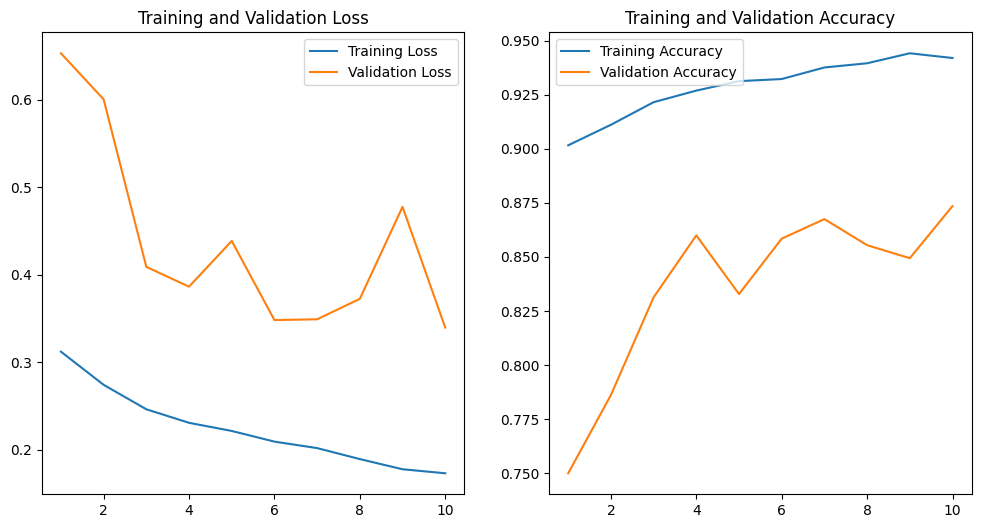

In [71]:
# Step 15: Visualize the metrics
epochs_range = range(1, 11)

plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.show()